# Facial Expression Recognition with TensorFlow 2.0

Changing TensorFlow Version to 2.0

In [ ]:
 %tensorflow_version 2.x

Habilitar GPU


> Ir em Runtime no menu no topo --> Change runtime type --> Em Hardware accelerator, selecionar GPU.

In [ ]:
import tensorflow as tf
print(tf.__version__)
#tf.debugging.set_log_device_placement(True)

2.7.0


In [ ]:
# check for GPU, at least 1 GPU needed
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [ ]:
# Check GPU information
!nvidia-smi

Sun Dec  5 15:26:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    57W / 149W |    145MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import Libraries and Packages

We load some standard libraries and packages of sklearn and keras.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sin, cos, pi

from keras.layers import Conv2D, LeakyReLU, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Functions needed
We defined some useful functions for preparing and ploting the data

In [ ]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

## Dataset (import, preparation, preprocessing)

> Banco de dados do desafio Kaggle, mais informações em:
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

O banco de dados possui 3 colunas: emotions | pixels | Usage

**Emotions**: são as emoções das imagens: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

**Pixels**: é a imagem 64x64 (matriz de pixels )

**Usage**: indica se é para ser usado como trainamento ou teste






! wget https://github.com/offsouza/Facial-Expression-Recognition/raw/master/fer2013.csv.zip

In [ ]:
#Unzip file .zip
! unzip /content/fer2013.csv.zip

Archive:  /content/fer2013.csv.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Load the image dataset with labels.

In [ ]:
data = pd.read_csv('/content/fer2013.csv.zip')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Verificando a quantidade de dados

Existe 35887 imagens com os  seguintes labels [0 1 2 3 5 6 ]


In [ ]:
print('Count: ', data.count())
print('Emotions labels', data.emotion.unique())

Count:  emotion    35887
pixels     35887
Usage      35887
dtype: int64
Emotions labels [0 2 4 6 3 5 1]


Verificando a quantidade de imagens de cada emoção

In [ ]:
emotions =  { 0: "Angry", 1:'Disgust', 2:'Fear', 3:'Happy', 4:"Sad", 5:'Surprise', 6:'Neutral'}

df = data['emotion'].value_counts()
df = pd.DataFrame(df)
df = df.rename(index=emotions)
df

,emotion
Happy,8989
Neutral,6198
Sad,6077
Fear,5121
Angry,4953
Surprise,4002
Disgust,547


Convertendo a coluna 'pixels' de String para Texto

In [ ]:
# carregando imagens

pix = data['pixels']  # Os pixels estão como texto(string) e não valor numérico, então passo o dataframe para um lista
pix = list(pix) # convertendo para lista
print("pix lista, primeiro valor: \n", pix[0:1],'\n\n') # imprimi a lista no formato formato texto
lista_pix_int = list() # crio uma lista vazia

from tqdm import tqdm   # mostra a barra de progresso
for i in tqdm(pix):
    # aqui eu faço um split da lista para que após o numero tenha uma virgula assim mudando de ['24 32 36' ] para ['24', '32', '36']
    # no mesmo comando eu transformo de string(ex:'24') para inteiro(ex:24) assim obtendo um vetor(lista) de numero inteiros e não mais
    # de strings
    pix_int = [float(j) for j in i.split() ]
    lista_pix_int.append(np.array(pix_int)) # realizado a transformação em um dos vetores, adiciono ele a uma lista


image_label = np.array(lista_pix_int) # Converto a lista com valores numéricos para um array numpy
print("pix array, primeiro valor: \n", image_label[0:1],'\n\n') # como pode notar a lista está em formato float
print()
print('---\nShape: ', image_label.shape)

pix lista, primeiro valor: 
 ['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 20

100%|██████████| 35887/35887 [00:23<00:00, 1508.83it/s]


pix array, primeiro valor: 
 [[ 70.  80.  82. ... 106. 109.  82.]] 



---
Shape:  (35887, 2304)


In [ ]:
scaler = MinMaxScaler()
df_n = scaler.fit_transform(image_label)

print(df_n)

image_label = df_n

[[0.2745098  0.31372549 0.32156863 ... 0.41568627 0.42745098 0.32156863]
 [0.59215686 0.58823529 0.57647059 ... 0.75686275 0.71764706 0.72156863]
 [0.90588235 0.83137255 0.61176471 ... 0.34509804 0.43137255 0.59607843]
 ...
 [0.06666667 0.06666667 0.0627451  ... 0.60392157 0.52156863 0.44313725]
 [0.11764706 0.10980392 0.10980392 ... 0.1372549  0.11764706 0.10980392]
 [0.0745098  0.05098039 0.05490196 ... 0.74117647 0.78039216 0.78823529]]


In [ ]:
df_n[0:1]

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863]])

In [ ]:
  # watching the shape (22366, 2304)
   # we have 22366 images that are in a 2304 position vector
   # but we know that the images have a size of 48x48 = 2304

   # So we have to resize all images to 48x48

print(type(image_label))
reshape_pix = image_label.reshape(image_label.shape[0], 48,48,1)
print("Shape antigo:" , image_label.shape)
print("Shape novo:" , reshape_pix.shape)

<class 'numpy.ndarray'>
Shape antigo: (35887, 2304)
Shape novo: (35887, 48, 48, 1)


In [ ]:
# now we have our image ie our input data in the proper format
# We have to split our data into training, testing and validation data
# I will split training data by 60%, Test 20% and Validation 20%

X = reshape_pix
y = data['emotion'].values


labels = pd.DataFrame(y)
y = np_utils.to_categorical(labels)

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42,shuffle= True)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_teste_val: ', X_test_val.shape)
print('y_teste_val: ', y_test_val.shape)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, shuffle= True)
print('\n ---------------\n')
print('X_teste: ', X_test.shape)
print('y_test: ', y_test.shape)
print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape)

X_train:  (21532, 48, 48, 1)
y_train:  (21532, 7)
X_teste_val:  (14355, 48, 48, 1)
y_teste_val:  (14355, 7)

 ---------------

X_teste:  (7177, 48, 48, 1)
y_test:  (7177, 7)
X_val:  (7178, 48, 48, 1)
y_val:  (7178, 7)


In [ ]:
y[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# display the images

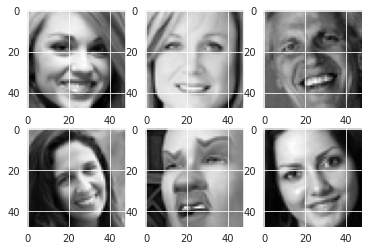

In [ ]:
x = X_train.reshape(X_train.shape[0], 48,48) #

# plot
import matplotlib.pyplot as plt
j =0
for i in range(8, 14):
    j+=1
    plt.subplot(2,3 ,j)
    image = x[i]
    plt.imshow(image, cmap= 'gray')
    #plt.text(0,45, emotions [y_train[i]], fontsize = 20, color = 'red')
plt.show()

NameError: ignored

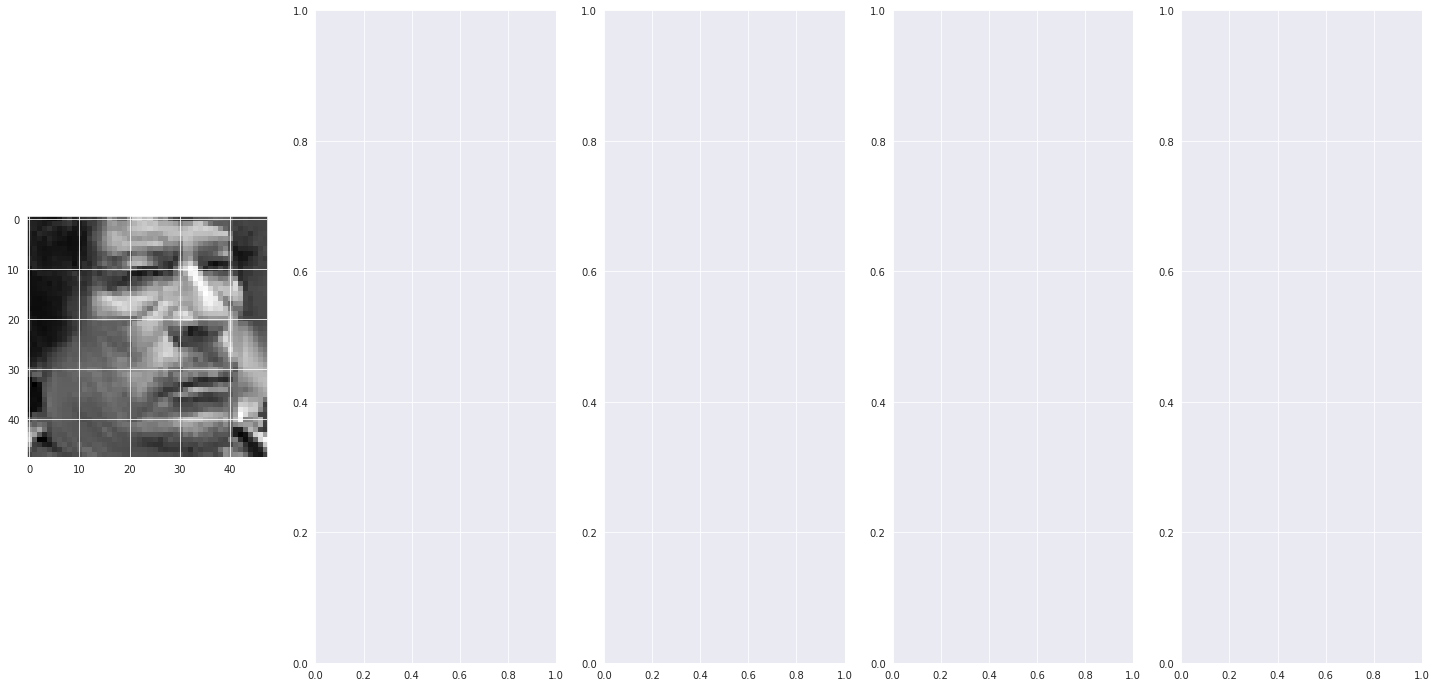

In [ ]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])



# Implementation of CNN Model

The neural network that will be built will be based on the VGG16 architecture

In [ ]:
# importando todos os modulos

import  os
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers, models
from    tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
class Block_ConvReluBN (keras.Model):

  def __init__(self, filters, strides=1, kernel=3, padding = 'same', dp = 0.3):
    super(Block_ConvReluBN, self).__init__()

    self.conv =  keras.layers.Conv2D(filters, kernel, strides=strides, padding=padding)
    self.bn= keras.layers.BatchNormalization()
    self.relu = keras.layers.Activation('relu')
    self.drop = keras.layers.Dropout(dp)

  def call(self,x,training=None):

    x = self.conv(x )
    x = self.bn(x, training = training)
    x = self.relu(x)
    x = self.drop(x)

    return x

## Creating VGG16 Model Class



In [ ]:
class Model_VGG16(keras.Model):

  def __init__(self,num_classes,**kwargs):
    super(Model_VGG16, self).__init__(**kwargs)

    self.num_classes = num_classes

    self.block01 = Block_ConvReluBN(64)
    self.block02 = Block_ConvReluBN(64)
    self.maxpool1 =  keras.layers.MaxPooling2D(pool_size=(2, 2))

    self.block03 = Block_ConvReluBN(128)
    self.block04 = Block_ConvReluBN(128)
    self.maxpool2 =  keras.layers.MaxPooling2D(pool_size=(2, 2))

    self.block05 = Block_ConvReluBN(256)
    self.block06 = Block_ConvReluBN(256)
    self.block07 = Block_ConvReluBN(256)
    self.maxpool3 =  keras.layers.MaxPooling2D(pool_size=(2, 2))

    self.block08 = Block_ConvReluBN(512)
    self.block09 = Block_ConvReluBN(512)
    self.block10 = Block_ConvReluBN(512)
    self.maxpool4 =  keras.layers.MaxPooling2D(pool_size=(2, 2))

    self.block11 = Block_ConvReluBN(512)
    self.block12 = Block_ConvReluBN(512)
    self.block13 = Block_ConvReluBN(512)
    self.maxpool5 =  keras.layers.MaxPooling2D(pool_size=(2, 2))

    self.flatten = keras.layers.Flatten()
    self.dense = keras.layers.Dense(512,kernel_regularizer=regularizers.l2(0.0001))
    self.bn2 = keras.layers.BatchNormalization()
    self.relu2 = keras.layers.Activation('relu')

    self.out = keras.layers.Dense(self.num_classes)

  def call(self, inputs,training=None):
    x= inputs
    x = self.block01(x)
    x = self.block02(x)
    x = self.maxpool1(x)

    x = self.block03(x)
    x = self.block04(x)
    x = self.maxpool2(x)

    x = self.block05(x)
    x = self.block06(x)
    x = self.block07(x)
    x = self.maxpool3(x)

    x = self.block08(x)
    x = self.block09(x)
    x = self.block10(x)
    x = self.maxpool4(x)

    x = self.block11(x)
    x = self.block12(x)
    x = self.block13(x)
    x = self.maxpool5(x)

    x = self.flatten(x)
    x = self.dense(x)
    x = self.relu2(x)
    x = self.bn2(x, training)
    x = self.out(x)

    return x

Model build


In [ ]:
batch_size = 32
classes = 7

# build model and optimizer
model = Model_VGG16(num_classes=classes)


model.build(input_shape=(None, 48, 48,1))


print("Number of variables in the model :", len(model.trainable_variables))

model.summary()

Number of variables in the model : 58
Model: "model_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block__conv_relu_bn (Block_  multiple                 896       
 ConvReluBN)                                                     
                                                                 
 block__conv_relu_bn_1 (Bloc  multiple                 37184     
 k_ConvReluBN)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 block__conv_relu_bn_2 (Bloc  multiple                 74368     
 k_ConvReluBN)                                                   
                                                                 
 block__conv_relu

### Training using Keras

In [ ]:
# treinamento keras
# compilando o otimizador, função de perda e metricas
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

check = ModelCheckpoint(filepath='weights_keras.hdf5', verbose=1, save_best_only=True)
#early = EarlyStopping(monitor='val_loss',patience=1)

# train
history = model.fit(X_train, y_train, batch_size=100, epochs=20, verbose=1,
         validation_data=(X_val , y_val)) # callbacks=[ check, early]

Epoch 1/20
216/216 [==============================] - 70s 267ms/step - loss: 1.9368 - accuracy: 0.2386 - val_loss: 1.8768 - val_accuracy: 0.2527
Epoch 2/20
216/216 [==============================] - 55s 257ms/step - loss: 1.8519 - accuracy: 0.2571 - val_loss: 1.9914 - val_accuracy: 0.1167
Epoch 3/20
216/216 [==============================] - 56s 257ms/step - loss: 1.7866 - accuracy: 0.2893 - val_loss: 2.0614 - val_accuracy: 0.2527
Epoch 4/20
216/216 [==============================] - 56s 257ms/step - loss: 1.6380 - accuracy: 0.3628 - val_loss: 1.6107 - val_accuracy: 0.3738
Epoch 5/20
216/216 [==============================] - 56s 257ms/step - loss: 1.4866 - accuracy: 0.4307 - val_loss: 1.8099 - val_accuracy: 0.3533
Epoch 6/20
216/216 [==============================] - 56s 257ms/step - loss: 1.3753 - accuracy: 0.4809 - val_loss: 1.4877 - val_accuracy: 0.4452
Epoch 7/20
216/216 [==============================] - 56s 258ms/step - loss: 1.3093 - accuracy: 0.5078 - val_loss: 1.3573 - val_ac

### Convergence analysis
Plots to help analyse the quality of the model

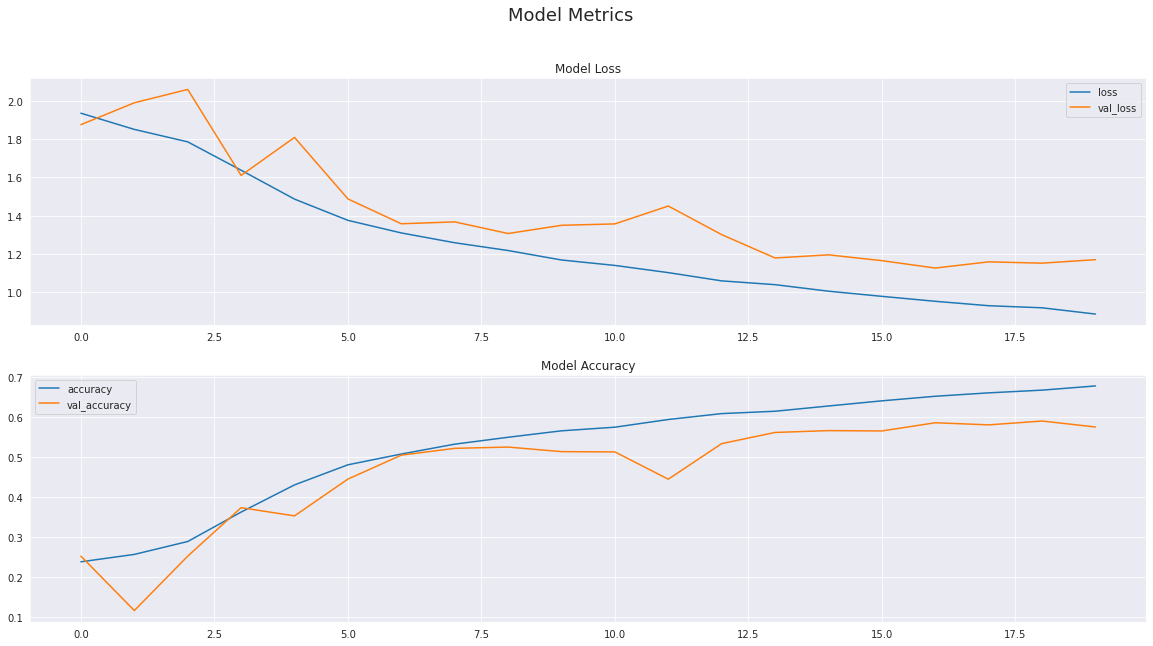

In [ ]:
# evaluate on test set
#scores = model.evaluate(X_test, y_test, batch_size, verbose=1)
#print("Final test loss and accuracy :", scores)

sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
df = pd.DataFrame(history.history)
df[['loss', 'val_loss']].plot(ax=ax[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].set_title('Model Loss', fontsize=12)
ax[1].set_title('Model Accuracy', fontsize=12)
fig.suptitle('Model Metrics', fontsize=18);

evaluate the model and compute loss and accuracy

Save the data obtained from the model

In [ ]:
!zip -r model.zip model_full/

	zip warning: name not matched: model_full/

zip error: Nothing to do! (try: zip -r model.zip . -i model_full/)


In [ ]:
model.save('model_full2', save_format="tf")


INFO:tensorflow:Assets written to: model_full2/assets
